In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit.providers.fake_provider import FakeManilaV2

from squlearn import Executor
from squlearn.feature_map import ChebRx
from squlearn.expectation_operator import IsingHamiltonian
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import SLSQP

from squlearn.qnn.qnn import QNN

In [2]:
executor = Executor(FakeManilaV2())

Define parameterized quantum circuit $Q(x,\theta)$

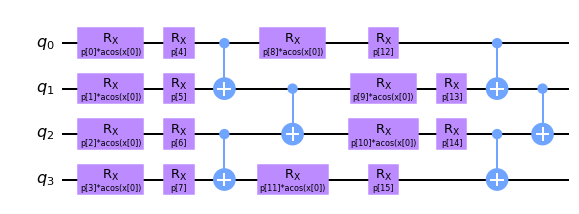

In [3]:
nqubits = 4

number_of_layers = 2
pqc = ChebRx(nqubits, 1, num_layers=number_of_layers)
pqc.draw()

Definition of the cost operator:
$\hat{H} = J \sum\limits_{i < j} Z_i Z_j + h\sum\limits_i Z_i + c$

In [4]:
ising_op = IsingHamiltonian(nqubits, I="S", Z="S", ZZ="S")
print(ising_op)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'IZZI', 'ZIIZ', 'ZIZI', 'ZZII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[1]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[1]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[2]),
 ParameterExpression(1.0*p[2])])


Example function: $log(x)$

In [5]:
qnn = QNN(pqc,ising_op,executor)

In [6]:
print(qnn.get_optree_from_string("f"))


                                                                     »
ancilla_0 -> 0 ──────────────────────────────────────────────────────»
               ┌─────────┐┌────┐┌─────────────────────────┐┌────────┐»
      q_0 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(p[0]*acos(x[0]) + π) ├┤ Rz(-π) ├»
               ├─────────┤├────┤├─────────────────────────┤├────────┤»
      q_1 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(p[1]*acos(x[0]) + π) ├┤ Rz(-π) ├»
               ├─────────┤├────┤├─────────────────────────┤├────────┤»
      q_2 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(p[2]*acos(x[0]) + π) ├┤ Rz(-π) ├»
               ├─────────┤├────┤├─────────────────────────┤├────────┤»
      q_3 -> 4 ┤ Rz(π/2) ├┤ √X ├┤ Rz(p[3]*acos(x[0]) + π) ├┤ Rz(-π) ├»
               └─────────┘└────┘└─────────────────────────┘└────────┘»
«                                                                 »
«ancilla_0 -> 0 ──────────────────────────────────────────────────»
«               ┌──────────────┐┌────┐ ┌────────┐         ┌────┐  »
«      q_0 -> 

In [7]:
print(qnn.get_optree_from_string("dfdp"))

[1.0*(0.5*acos(x[0])*
                                                                        »
ancilla_0 -> 0 ─────────────────────────────────────────────────────────»
               ┌─────────┐┌────┐┌────────────────────────────┐┌────────┐»
      q_0 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(p[0]*acos(x[0]) + 3π/2) ├┤ Rz(-π) ├»
               ├─────────┤├────┤└┬─────────────────────────┬─┘├────────┤»
      q_1 -> 2 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(p[1]*acos(x[0]) + π) ├──┤ Rz(-π) ├»
               ├─────────┤├────┤ ├─────────────────────────┤  ├────────┤»
      q_2 -> 3 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(p[2]*acos(x[0]) + π) ├──┤ Rz(-π) ├»
               ├─────────┤├────┤ ├─────────────────────────┤  ├────────┤»
      q_3 -> 4 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(p[3]*acos(x[0]) + π) ├──┤ Rz(-π) ├»
               └─────────┘└────┘ └─────────────────────────┘  └────────┘»
«                                                                 »
«ancilla_0 -> 0 ──────────────────────────────────────────────────»
«               ┌───────────